# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna
### Swagath Babu 
### Jacob Thomas


# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the Parameters

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

## Load Data

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1], verbose=True)

Training/Valid data shape: (237, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [5]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [6]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

## Comparing different models for Subject 1 and giving a comparative perspective

### The models architecture can be found in the models.py file

## CNN

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.43290
	Train loss: 0.04444, Accuracy: 44/189 (23.28%)
	Validation loss: 0.02873, Accuracy: 15/48 (31.25%)
	Test loss: 0.02809, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.41354
	Train loss: 0.04471, Accuracy: 48/189 (25.40%)
	Validation loss: 0.02859, Accuracy: 13/48 (27.08%)
	Test loss: 0.02841, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37440
	Train loss: 0.04419, Accuracy: 54/189 (28.57%)
	Validation loss: 0.02816, Accuracy: 17/48 (35.42%)
	Test loss: 0.02809, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.42373
	Train loss: 0.04365, Accuracy: 51/189 (26.98%)
	Validation loss: 0.02825, Accuracy: 17/48 (35.42%)
	Test loss: 0.02817, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.31292
	Train loss: 0.04368, Accuracy: 48/189 (25.40%)
	Validation loss: 0.02827, Accuracy: 17/48 (35.42%)
	Test loss: 0.028

Best validation accuracy:
0.667

Best test accuracy:
0.51

### Plotting Metrics v/s No. of Epochs

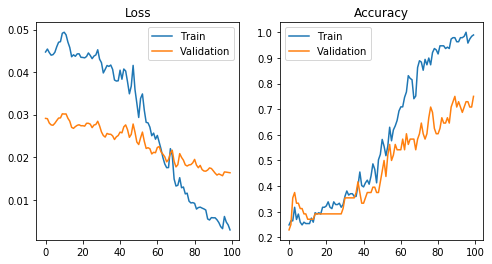


## LSTM

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.46483
	Train loss: 0.04468, Accuracy: 44/189 (23.28%)
	Validation loss: 0.02869, Accuracy: 15/48 (31.25%)
	Test loss: 0.02807, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.42191
	Train loss: 0.04501, Accuracy: 44/189 (23.28%)
	Validation loss: 0.02862, Accuracy: 15/48 (31.25%)
	Test loss: 0.02836, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.40531
	Train loss: 0.04474, Accuracy: 44/189 (23.28%)
	Validation loss: 0.02860, Accuracy: 15/48 (31.25%)
	Test loss: 0.02835, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.42085
	Train loss: 0.04413, Accuracy: 44/189 (23.28%)
	Validation loss: 0.02871, Accuracy: 15/48 (31.25%)
	Test loss: 0.02829, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.33946
	Train loss: 0.04313, Accuracy: 61/189 (32.28%)
	Validation loss: 0.02893, Accuracy: 12/48 (25.00%)
	Test loss: 0.028

Best validation accuracy:
0.3125677

Best test accuracy:
0.40

## Plotting Metrics v/s No. of Epochs
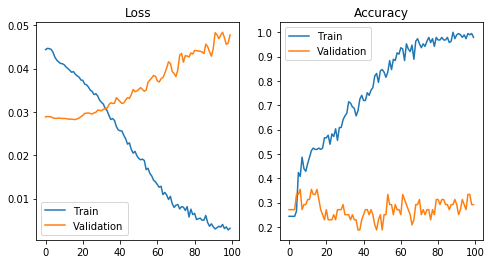


## CNN + LSTM

In [9]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.37354
	Train loss: 0.04406, Accuracy: 49/189 (25.93%)
	Validation loss: 0.02897, Accuracy: 9/48 (18.75%)
	Test loss: 0.02770, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37059
	Train loss: 0.04403, Accuracy: 49/189 (25.93%)
	Validation loss: 0.02902, Accuracy: 9/48 (18.75%)
	Test loss: 0.02770, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37122
	Train loss: 0.04399, Accuracy: 49/189 (25.93%)
	Validation loss: 0.02905, Accuracy: 9/48 (18.75%)
	Test loss: 0.02769, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.36981
	Train loss: 0.04392, Accuracy: 49/189 (25.93%)
	Validation loss: 0.02905, Accuracy: 9/48 (18.75%)
	Test loss: 0.02766, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.36792
	Train loss: 0.04357, Accuracy: 49/189 (25.93%)
	Validation loss: 0.02884, Accuracy: 9/48 (18.75%)
	Test loss: 0.02747, A

Best validation accuracy:
0.7708333333333334

Best test accuracy:
0.74

## Plotting Metrics v/s No. of Epochs:
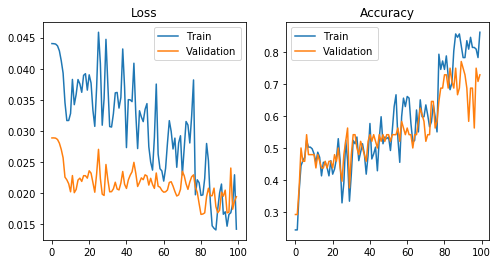

## GRU

In [10]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.35988
	Train loss: 0.04401, Accuracy: 51/189 (26.98%)
	Validation loss: 0.02954, Accuracy: 8/48 (16.67%)
	Test loss: 0.02778, Accuracy: 16/50 (32.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.39232
	Train loss: 0.04390, Accuracy: 53/189 (28.04%)
	Validation loss: 0.02978, Accuracy: 10/48 (20.83%)
	Test loss: 0.02789, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.37967
	Train loss: 0.04358, Accuracy: 63/189 (33.33%)
	Validation loss: 0.02980, Accuracy: 9/48 (18.75%)
	Test loss: 0.02803, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.34989
	Train loss: 0.04313, Accuracy: 60/189 (31.75%)
	Validation loss: 0.02986, Accuracy: 11/48 (22.92%)
	Test loss: 0.02831, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.33912
	Train loss: 0.04252, Accuracy: 66/189 (34.92%)
	Validation loss: 0.02996, Accuracy: 10/48 (20.83%)
	Test loss: 0.02833

Best validation accuracy:
0.3541666666666667

Best test accuracy:
0.40

## Plotting Metrics v/s No of Epochs
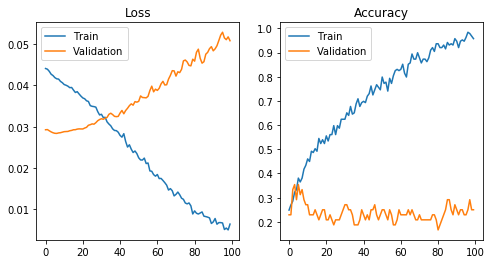

## CNN + GRU

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/189 (0.00%)]		Loss: 1.40926
	Train loss: 0.04402, Accuracy: 45/189 (23.81%)
	Validation loss: 0.02877, Accuracy: 15/48 (31.25%)
	Test loss: 0.02773, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/189 (0.00%)]		Loss: 1.37973
	Train loss: 0.04362, Accuracy: 54/189 (28.57%)
	Validation loss: 0.02835, Accuracy: 14/48 (29.17%)
	Test loss: 0.02750, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/189 (0.00%)]		Loss: 1.34960
	Train loss: 0.04066, Accuracy: 97/189 (51.32%)
	Validation loss: 0.02633, Accuracy: 23/48 (47.92%)
	Test loss: 0.02580, Accuracy: 22/50 (44.00%)

Training Progress: 	Epoch 4 [0/189 (0.00%)]		Loss: 1.25631
	Train loss: 0.03567, Accuracy: 97/189 (51.32%)
	Validation loss: 0.02314, Accuracy: 24/48 (50.00%)
	Test loss: 0.02272, Accuracy: 23/50 (46.00%)

Training Progress: 	Epoch 5 [0/189 (0.00%)]		Loss: 1.14216
	Train loss: 0.03151, Accuracy: 98/189 (51.85%)
	Validation loss: 0.02037, Accuracy: 25/48 (52.08%)
	Test loss: 0.020

Best validation accuracy:
0.6875

Best test accuracy:
0.7

#Plotting Metrics v/s No of Epochs
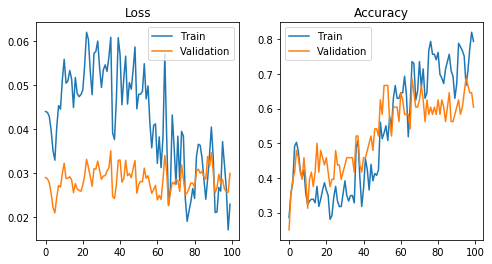